In [1]:
from pyrvea.Population.Population import Population
from pyrvea.Problem.testProblem import testProblem
from pyrvea.EAs.slowRVEA import slowRVEA
import altair as alt
import pandas as pd
import numpy as np

In [2]:
alt.data_transformers.enable('json')
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
name = "DTLZ2"
k = 10
numobj = 7
numconst = 0
numvar = numobj + k - 1
problem = testProblem(name, numvar, numobj, numconst)

In [4]:
pop = Population(problem, assign_type="empty")

In [5]:
orig_point = [1] * numobj
first_ref = [1, 1] + [0]*(numobj-2)
second_ref = [0]*(numobj-2) + [1,1]

# Initial Evolution

In [6]:
pop.evolve(slowRVEA, {"generations_per_iteration": 200, "iterations": 15})

Plot saved as:  DTLZ2_7.html
View the plot by opening the file in browser.
To view the plot in Jupyter Notebook, use the IFrame command.


In [7]:
pop.evolve(
    slowRVEA,
    {
        "generations_per_iteration": 4,
        "iterations": 20,
        "old_point": orig_point,
        "ref_point": first_ref,
    },
)

/home/bssainix/Projects/pyRVEA/pyrvea/Selection/APD_select.py:48: UserWarning:

RVEA.py line 64 cosine smaller than 0 increased to 0



In [8]:
pop.evolve(
    slowRVEA,
    {
        "generations_per_iteration": 4,
        "iterations": 20,
        "old_point": first_ref,
        "ref_point": second_ref,
    },
)

In [7]:
archive_df = pop.archive

In [8]:
objective_norms = archive_df['objective_values'].apply(lambda x: np.linalg.norm(x))
archive_df['objective_norms'] = objective_norms

In [9]:
x = alt.X('generation')
y_obj = alt.Y('median(objective_norms)', scale=alt.Scale(type='log',domain=(1,10)))

In [10]:
line = alt.Chart(archive_df).mark_line(clip=True).encode(x=x, y=y_obj).properties(title='Median Magnitude of objective vectors')

In [11]:
band =alt.Chart(archive_df).mark_errorband(extent='iqr', clip=True).encode(x=x, y='objective_norms')

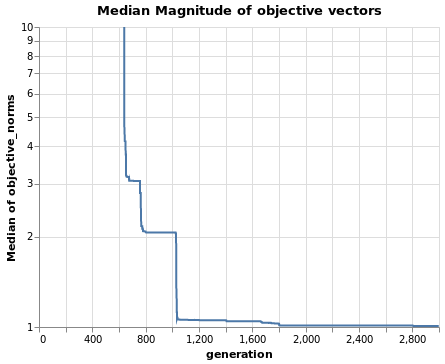

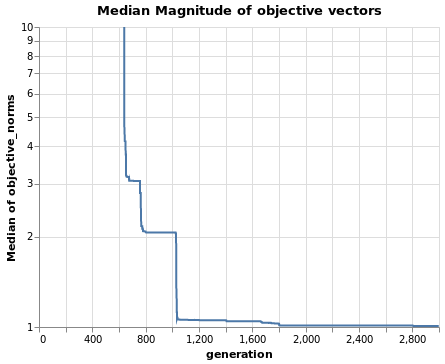

In [12]:
line

In [16]:
angle_dev_from_1 = archive_df['objective_values'].apply(lambda x: np.degrees(np.arccos(np.dot(x,[1,1,0,0,0])/(np.linalg.norm(x)*np.linalg.norm([1,1,0,0,0])))))
angle_dev_from_2 = archive_df['objective_values'].apply(lambda x: np.degrees(np.arccos(np.dot(x,[0,0,0,1,1])/(np.linalg.norm(x)*np.linalg.norm([0,0,0,1,1])))))

In [17]:
archive_df['angle_1'] = angle_dev_from_1
archive_df['angle_2'] = angle_dev_from_2

In [18]:
y_angle_1 = alt.Y('median(angle_1)')
y_angle_2 = alt.Y('median(angle_2)')

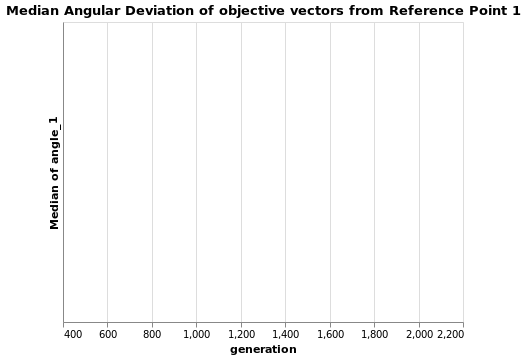

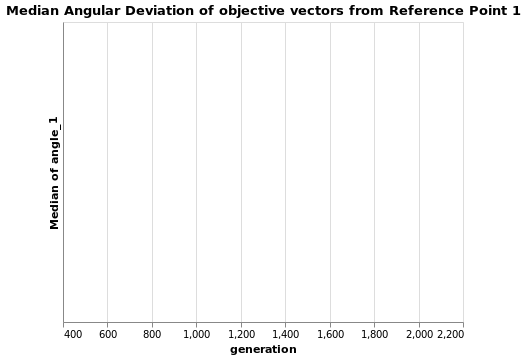

In [19]:
line_angle_1 = alt.Chart(archive_df).mark_line(clip=True).encode(x=x, y=y_angle_1).properties(title='Median Angular Deviation of objective vectors from Reference Point 1')
line_angle_1

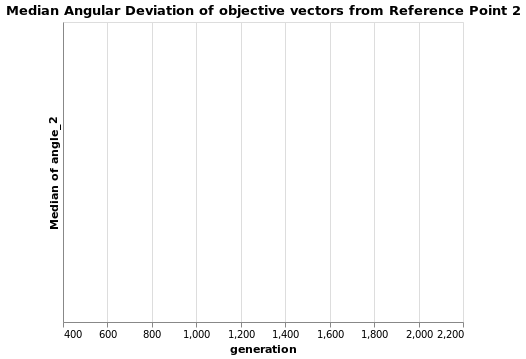

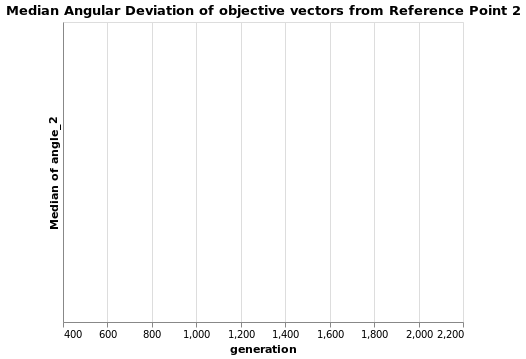

In [20]:
line_angle_2 = alt.Chart(archive_df).mark_line(clip=True).encode(x=x, y=y_angle_2).properties(title='Median Angular Deviation of objective vectors from Reference Point 2')
line_angle_2

# Old RVEA

In [13]:
pop = Population(problem, assign_type="empty")

In [14]:
pop.evolve(slowRVEA, {"generations_per_iteration": 100, "iterations": 20})

Plot saved as:  DTLZ3_5.html
View the plot by opening the file in browser.
To view the plot in Jupyter Notebook, use the IFrame command.


In [ ]:
pop.evolve(
    slowRVEA,
    {
        "generations_per_iteration": 4,
        "iterations": 20,
        "old_point": [1, 1, 0, 0, 0],
        "ref_point": [1, 1, 0, 0, 0],
    },
)

In [ ]:
pop.evolve(
    slowRVEA,
    {
        "generations_per_iteration": 4,
        "iterations": 20,
        "old_point": [0, 0, 0, 1, 1],
        "ref_point": [0, 0, 0, 1, 1],
    },
)

In [ ]:
archive_df = pop.archive

In [ ]:
objective_norms = archive_df['objective_values'].apply(lambda x: np.linalg.norm(x))
archive_df['objective_norms'] = objective_norms

In [ ]:
x = alt.X('generation', scale=alt.Scale(domain=(500,2060)))
y_obj = alt.Y('mean(objective_norms)', scale=alt.Scale(type='log',domain=(1,10)))

In [ ]:
line = alt.Chart(archive_df).mark_line(clip=True).encode(x=x, y=y_obj).properties(title='Median Magnitude of objective vectors')
band =alt.Chart(archive_df).mark_errorband(extent='ci', clip=True).encode(x=x, y='objective_norms')
line